<a href="https://colab.research.google.com/github/Auramariaar/Estimacion-de-Provisiones-en-Seguros/blob/main/Data_Understanding_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Entedimiento de los datos

**Importar datos**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
import seaborn as sns

import warnings
warnings.filterwarnings(action="ignore", category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('wkcomp_pos.csv')
print('Number of rows and columns:', data.shape)

Number of rows and columns: (13200, 13)


In [ ]:
#  Quitar duplicados en caso que hayan
data.drop_duplicates().shape

(13200, 13)

In [ ]:
data.head(6).T

,0,1,2,3,4,5
GRCODE,86,86,86,86,86,86
GRNAME,Allstate Ins Co Grp,Allstate Ins Co Grp,Allstate Ins Co Grp,Allstate Ins Co Grp,Allstate Ins Co Grp,Allstate Ins Co Grp
AccidentYear,1988,1988,1988,1988,1988,1988
DevelopmentYear,1988,1989,1990,1991,1992,1993
DevelopmentLag,1,2,3,4,5,6
IncurLoss_D,367404,362988,347288,330648,354690,350092
CumPaidLoss_D,70571,155905,220744,251595,274156,287676
BulkLoss_D,127737,60173,27763,15280,27689,20641
EarnedPremDIR_D,400699,400699,400699,400699,400699,400699
EarnedPremCeded_D,5957,5957,5957,5957,5957,5957


**Descripción datos**

In [ ]:
# estadísticas de base: características nominales
data.describe(include=['object']).T

,count,unique,top,freq
GRNAME,13200,132,Allstate Ins Co Grp,100


In [ ]:
# estadísticas básicas: características numéricas
data.describe().T

,count,mean,std,min,25%,50%,75%,max
GRCODE,13200.0,17153.053030,12512.206105,86.0,8526.0,14110.0,26983.25,44300.0
AccidentYear,13200.0,1992.500000,2.872390,1988.0,1990.0,1992.5,1995.00,1997.0
DevelopmentYear,13200.0,1997.000000,4.062173,1988.0,1994.0,1997.0,2000.00,2006.0
DevelopmentLag,13200.0,5.500000,2.872390,1.0,3.0,5.5,8.00,10.0
IncurLoss_D,13200.0,11532.048258,35595.560208,-59.0,0.0,544.0,6526.50,367404.0
CumPaidLoss_D,13200.0,8215.737348,25714.081464,-338.0,0.0,351.5,4565.00,325322.0
BulkLoss_D,13200.0,1570.125606,7259.022141,-4621.0,0.0,5.0,259.25,145296.0
EarnedPremDIR_D,13200.0,18438.469697,51830.703058,-6518.0,0.0,1419.0,11354.25,421223.0
EarnedPremCeded_D,13200.0,1812.338636,6666.663148,-3522.0,0.0,144.5,1141.00,78730.0
EarnedPremNet_D,13200.0,16626.128788,48941.724122,-9731.0,0.0,827.0,9180.50,418755.0


In [ ]:
#Contar valores faltantes
data.isnull().sum() #No hay

GRCODE               0
GRNAME               0
AccidentYear         0
DevelopmentYear      0
DevelopmentLag       0
IncurLoss_D          0
CumPaidLoss_D        0
BulkLoss_D           0
EarnedPremDIR_D      0
EarnedPremCeded_D    0
EarnedPremNet_D      0
Single               0
PostedReserve97_D    0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   GRCODE             13200 non-null  int64 
 1   GRNAME             13200 non-null  object
 2   AccidentYear       13200 non-null  int64 
 3   DevelopmentYear    13200 non-null  int64 
 4   DevelopmentLag     13200 non-null  int64 
 5   IncurLoss_D        13200 non-null  int64 
 6   CumPaidLoss_D      13200 non-null  int64 
 7   BulkLoss_D         13200 non-null  int64 
 8   EarnedPremDIR_D    13200 non-null  int64 
 9   EarnedPremCeded_D  13200 non-null  int64 
 10  EarnedPremNet_D    13200 non-null  int64 
 11  Single             13200 non-null  int64 
 12  PostedReserve97_D  13200 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 1.3+ MB


In [ ]:
data['AccidentYear'] = pd.to_datetime(data['AccidentYear'], format='%Y')
data['DevelopmentYear'] = pd.to_datetime(data['DevelopmentYear'], format='%Y')

In [ ]:
print(data['AccidentYear'].dtypes)
print(data['DevelopmentYear'].dtypes)

datetime64[ns]
datetime64[ns]


In [ ]:
print(data['AccidentYear'].head())
print(data['DevelopmentYear'].head())

0   1988-01-01
1   1988-01-01
2   1988-01-01
3   1988-01-01
4   1988-01-01
Name: AccidentYear, dtype: datetime64[ns]
0   1988-01-01
1   1989-01-01
2   1990-01-01
3   1991-01-01
4   1992-01-01
Name: DevelopmentYear, dtype: datetime64[ns]


In [ ]:
print(data.skew())

GRCODE               0.560995
DevelopmentLag       0.000000
IncurLoss_D          5.400459
CumPaidLoss_D        5.847218
BulkLoss_D           9.233810
EarnedPremDIR_D      4.776148
EarnedPremCeded_D    8.060025
EarnedPremNet_D      4.926814
Single              -1.020737
PostedReserve97_D    5.923483
dtype: float64


Basándonos en los valores proporcionados:

- Las columnas con coeficientes positivos como 'GRCODE', 'IncurLoss_D', 'CumPaidLoss_D', 'BulkLoss_D', 'EarnedPremDIR_D', 'EarnedPremCeded_D', 'EarnedPremNet_D' tienen distribuciones sesgadas hacia la derecha, lo que significa que tienen valores más altos concentrados en el extremo derecho.

- La columna 'Single' tiene un coeficiente negativo, lo que indica que la distribución está sesgada hacia la izquierda, con más valores en el extremo izquierdo.

- 'DevelopmentLag' y 'PostedReserve97_D' tienen coeficientes cercanos a 0, lo que sugiere que sus distribuciones son aproximadamente simétricas.

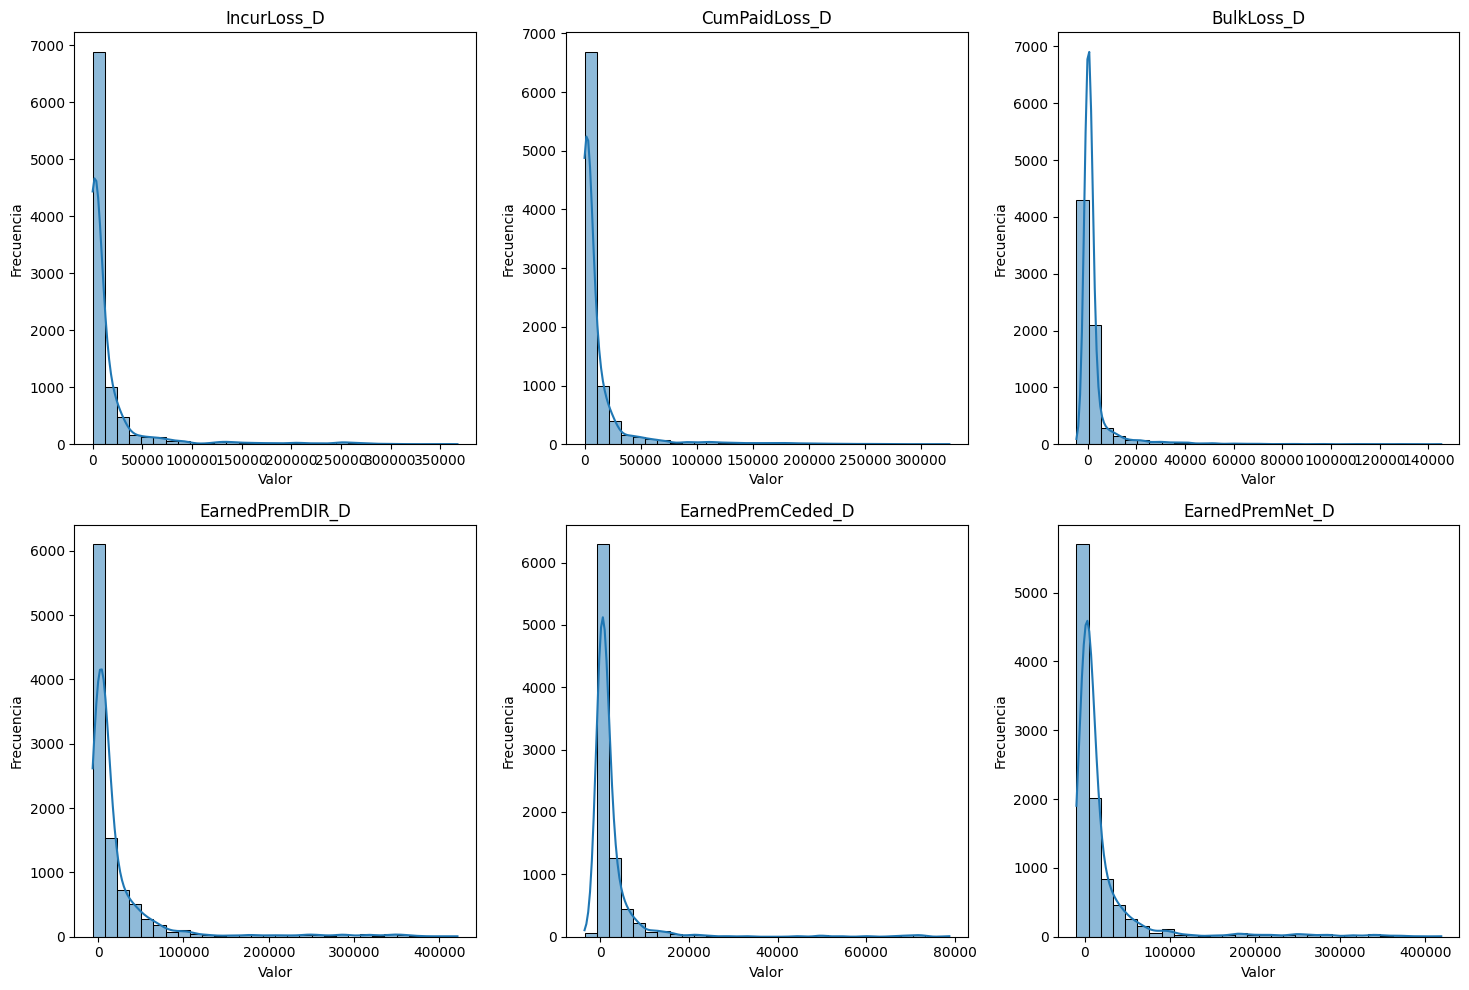

In [ ]:
# Filtra los valores de cero en las columnas de dinero
money_columns = ["IncurLoss_D", "CumPaidLoss_D", "BulkLoss_D", "EarnedPremDIR_D", "EarnedPremCeded_D", "EarnedPremNet_D"]
filtered_data = data[data[money_columns] != 0].dropna()

# Filtrar los valores de cero y generar histogramas
plt.figure(figsize=(15, 10))
for column in money_columns:
    non_zero_data = data[data[column] != 0]
    plt.subplot(2, 3, money_columns.index(column) + 1)
    sns.histplot(non_zero_data[column], bins=30, kde=True)
    plt.title(column)
    plt.xlabel("Valor")
    plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()